In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
#data = pd.read_csv('ActPET.txt', delim_whitespace =True)

###Activimetro 55tR con fuente Co-57
data = pd.read_csv('ActSPECT.txt', delim_whitespace =True)


#data.head()

In [110]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion
count,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,220.00000,0.018314,2.355877,155.296583,352.553531,-1.885011
std,126.87264,0.029016,3.189927,0.031870,177.048141,0.639048
min,1.00000,0.010000,0.250000,155.000000,128.000000,-4.300000
25%,110.50000,0.010000,0.330000,155.300000,200.600000,-2.200000
50%,220.00000,0.010000,0.450000,155.300000,306.000000,-2.000000
75%,329.50000,0.020000,2.735000,155.300000,472.000000,-1.800000
max,439.00000,0.260000,11.860000,155.300000,748.000000,1.600000


In [111]:
##### de mCi a Bq
#mcibq=3.7E7

##### de uCi a Bq
#ucibq=3.7E4

In [112]:
### Fuentes de Chequeo en Medicina Nuclear 

##############################
########   Co 57  ###########

#Fecha de referencia
# primero de noviembre de 2015
Co='01/11/2015'
Co57= datetime.datetime.strptime(Co,'%d/%m/%Y')
#Actividad en mCi
AcCo= 5.774
#Actividad en Bq [1/s]
#AcCobq= AcCo*mcibq
### half life [días]
HLCo= 271.74
### half life [s]
HLCobq= 271.74*86400
### Lambda
Lambdaco= np.log(2)/HLCo
### Lambda [1/s]
Lambdacobq= np.log(2)/HLCobq

#############################################
######## Medicina Nuclear Cs 137  ###########

#Fecha de referencia
# primero de noviembre de 2015
Cs='01/11/2015'
Cs137= datetime.datetime.strptime(Cs,'%d/%m/%Y')
#Actividad en uCi
AcCs= 214.9
#Actividad en Bq [1/s]
#AcCsbq= AcCs*ucibq
### half life  [días]
HLCs= 30.08*365
### half life [s]
HLCsbq= HLCs*86400
### Lambda
Lambdacs= np.log(2)/HLCs
### Lambda [1/s]
Lambdacsbq= np.log(2)/HLCsbq



#############################################
######## Radiofarmacia Cs 137  ###########

#Fecha de referencia
# primero de Abril de 2007
#Csrf='01/04/2007'
#Cs137rf= datetime.datetime.strptime(Csrf,'%d/%m/%Y')
#Actividad en uCi
#AcCsrf= 190.1
#Actividad en Bq [1/s]
#AcCsrfbq= AcCsrf*ucibq


### Lambda
Lambdacsrf= np.log(2)/HLCs

In [113]:
################# Elapsed time ###############

#data["Fecha"][0]

d = pd.to_datetime(data["Fecha"],format='%m/%d/%y')
###Cobalto 57
timeE=(d-Co57)

### Cesio 137
#timeE=(d-Cs137)
#timeE=(d-Cs137rf)

In [114]:
data['timeE']=timeE.dt.days.values

In [115]:
############# Expected Activity ###########
#### Act =Act_oe^{-\lambda t}

###Cobalto 57
Actco=AcCo*np.exp(-Lambdaco*data["timeE"])*1000

###Cesio 137
#Actcs=AcCs*np.exp(-Lambdacs*data["timeE"])

In [116]:
#### Cobalto 57
data['EAct']=round(Actco,1)
#### Cesio 137
#data['EAct']=round(Actcs,1)

In [117]:
############# Acceptable Range of dose calibrator readings ###########

### 10% ó 5%
X=data['EAct']*(0.05)


### Rango
Rmin=np.round(data['EAct']-X,1)
Rmax=np.round(data['EAct']+X,1)


### Ingresar datos en el data 
data['Rmin']=Rmin
data['Rmax']=Rmax

In [118]:
##Diferencia
#perce=np.absolute(((data['EAct']-data['Actividad'])*100)/data['EAct'])
perce=(-(data['EAct']-data['Actividad'])*100)/data['EAct']


percent=round(perce,1)

### Ingresar datos en el data 
data['percent']=percent
#percent

In [119]:
razon=data['Actividad']/data['EAct']
#razoninc=data['Incer']/data['EAct']
data['razon']=round(razon,3)
#data['razon'].head(10)

In [120]:
###### Diferencia entre datos
diffajuste = data.AjustemV.diff()
diffajuste.replace(np.nan, 0.0, inplace=True)
data['Diffzero']=diffajuste

In [121]:
#df= pd.DataFrame({'AjustemV':data['AjustemV'],'Voltaje':data['Voltaje']})

In [122]:
#np.savetxt('datosdf.txt',df.values,delimiter=" ",fmt='%s')

In [123]:
#datos= np.genfromtxt("datosdf.txt")

In [124]:
#g=open('nuevasalida.txt','w')
#g.write('Ajuste=[{0}] Voltaje=[{1}]'.format(datos[:,0],datos[:,1]))
#g.close

In [125]:
#data.loc[(data['Fondo']<0.0) | (data['Fondo']>100.0)]= np.nan
# simply drop whole row with NaN in "Fondo" column
#data.dropna(subset=["Fondo"], axis=0, inplace=True)
data.loc[(data['Voltaje']<155.3)]= np.nan
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [126]:
#z=np.array(data['Fondo'])
#z

In [127]:
#np.savetxt('pruebamatlab.txt',z,delimiter=" ",fmt='%s')

In [185]:
data['AjustemV'].describe()

count    434.000000
mean       0.018410
std        0.029169
min        0.010000
25%        0.010000
50%        0.010000
75%        0.020000
max        0.260000
Name: AjustemV, dtype: float64

In [186]:
### Agrupar datos 
y= data['AjustemV'].values.reshape(62,7)

In [187]:
subgroup= pd.DataFrame(data=y)

In [188]:
# create headers list
headers = ["n1","n2","n3","n4","n5","n6","n7"]
subgroup.columns = headers

In [189]:
mean=subgroup[["n1","n2","n3","n4","n5","n6","n7"]].mean(axis=1)
subgroup['suma']= mean

In [190]:
std=subgroup[["n1","n2","n3","n4","n5","n6","n7"]].std(axis=1)
subgroup['std']= std

####  Carta Xbar
$$ UCL=\bar{\bar{x}}+\frac{3\bar{s}}{C_4\sqrt{n}} $$
$$ LCL=\bar{\bar{x}}-\frac{3\bar{s}}{C_4\sqrt{n}} $$
####  Carta S
$$ UCLs=\bar{s}+\frac{3\bar{s}\sqrt{1-C_4^2}}{C_4} $$
$$ LCLs=\bar{s}+\frac{3\bar{s}\sqrt{1-C_4^2}}{C_4} $$

In [191]:
gmean=0.0136
gstd=0.00054602
#n=6
#c4=0.9515
#n=7
c4=0.9594
UCL=gmean+((3*gstd)/(c4*np.sqrt(6)))
LCL=gmean-((3*gstd)/(c4*np.sqrt(6)))

In [192]:
##### Diffzero
#USL=0.30
#LSL=-0.30
##### RAZON
#USL=1.05
#LSL=0.95
#target=1.00
####### Voltaje
#LSL=147.5
#USL=163.1

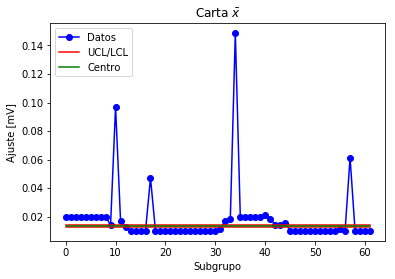

In [196]:
plt.plot(subgroup['suma'],'ob-',label='Datos')
#plt.plot((0,61),(USL,USL),'m',label='USL/LSL')
#plt.plot((0,61),(LSL,LSL),'m')
#plt.plot((0,61),(target,target),'c--',label='Objetivo')
plt.plot((0,61),(UCL,UCL),'r',label='UCL/LCL')
plt.plot((0,61),(LCL,LCL),'r')
plt.plot((0,61),(gmean,gmean),'g',label='Centro')
plt.xlabel(r'Subgrupo')
#plt.ylabel(r'Razón')
#plt.ylabel(r'Voltaje [V]')
#plt.ylabel(r'Fondo [$\mu$Ci]')
plt.ylabel(r'Ajuste [mV]')
plt.legend(loc='upper left')
plt.title(r'Carta $\bar{x}$ ')
plt.savefig('ccajusxbartrmn.pdf')

In [197]:
UCLs=gstd+((3*gstd*np.sqrt(1-(c4**2)))/c4)
LCLs=gstd-((3*gstd*np.sqrt(1-(c4**2)))/c4)
LCLs

6.4455282902577333e-05

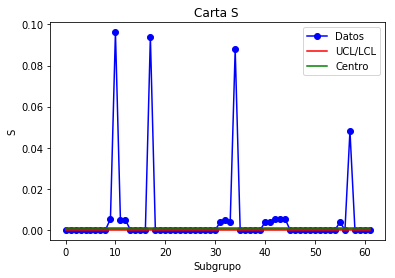

In [200]:
plt.plot(subgroup['std'],'ob-',label='Datos')
plt.plot((0,61),(UCLs,UCLs),'r',label='UCL/LCL')
plt.plot((0,61),(LCLs,LCLs),'r')
plt.plot((0,61),(gstd,gstd),'g',label='Centro')
plt.xlabel(r'Subgrupo')
plt.ylabel(r'S')
plt.title(r'Carta S ')
plt.legend(loc='upper right')
plt.savefig('ccajusstrmn.pdf')

In [139]:
#plt.plot(data['Number'],data['percent'],'ob-')
#plt.plot((0,350),(sigma3p,sigma3p))
#plt.plot((0,350),(sigma3n,sigma3n))
#plt.plot((0,350),(grandmean,grandmean))

#### Voltaje nominal CRC 55tR- MN: 155.3 V. 5% desviacion 
#plt.text(330, 155.5, 'Voltaje nominal 155.3',size=14)
#plt.text(340, 148, 'Voltaje 5% 147.5',size=14)
#plt.text(340, 162, 'Voltaje 5% 163.1',size=14)
#plt.plot((0, 438),(147.5,147.5), 'k:', linewidth=2) 
#plt.plot((0, 438),(163.1,163.1), 'k:', linewidth=2)